# 1) Data prep

In [8]:
import polars as pl
dat_standard_processed = pl.read_csv("./Data/10246247/standard_processed.csv")
dat_probend_processed = pl.read_csv("./Data/10246247/probend_processed.csv")
dat_noise_processed = pl.read_csv("./Data/10246247/noise_processed.csv")
dat_probend_noise_processed = pl.read_csv("./Data/10246247/probend_noise_processed.csv")

Comparing standard_processed and probend_processed:
Columns only in standard_processed:
{'memory_usage', 'turns'}

Columns only in probend_processed:
{'probend'}




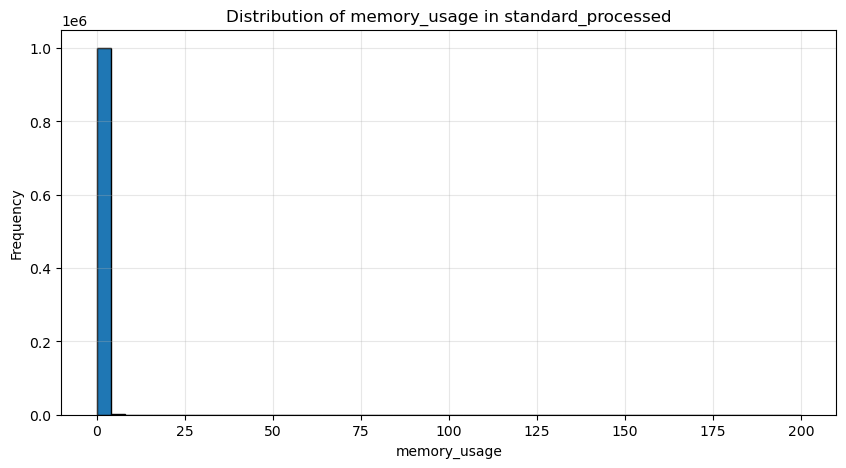

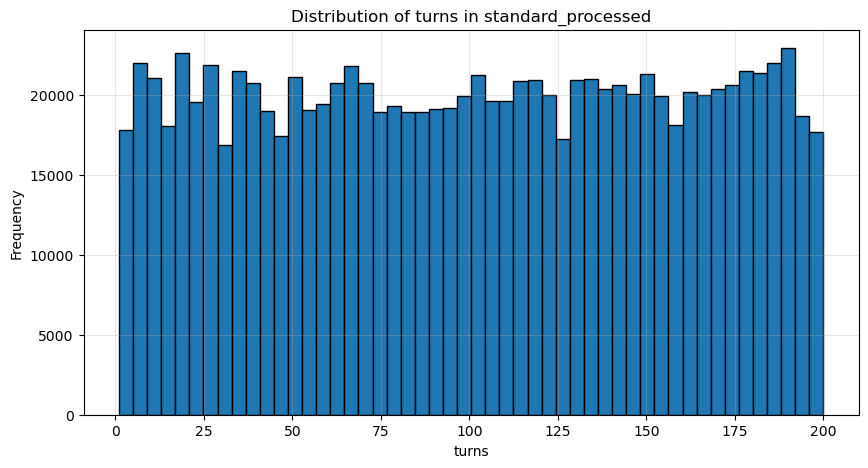

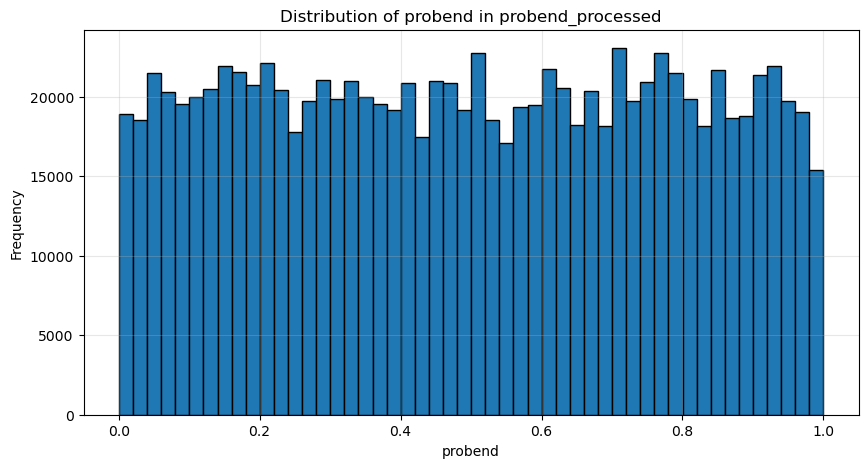

Comparing standard_processed and noise_processed:
Columns only in standard_processed:
set()

Columns only in noise_processed:
{'noise'}




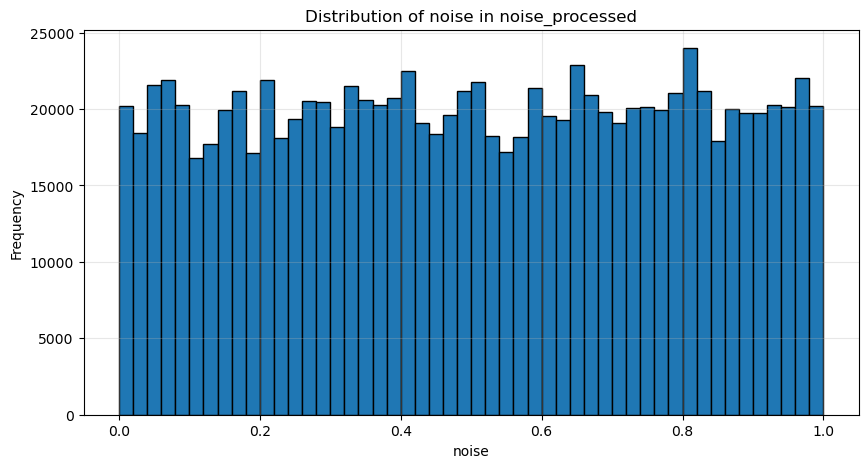

Comparing standard_processed and probend_noise_processed:
Columns only in standard_processed:
{'memory_usage', 'turns'}

Columns only in probend_noise_processed:
{'noise', 'probend'}




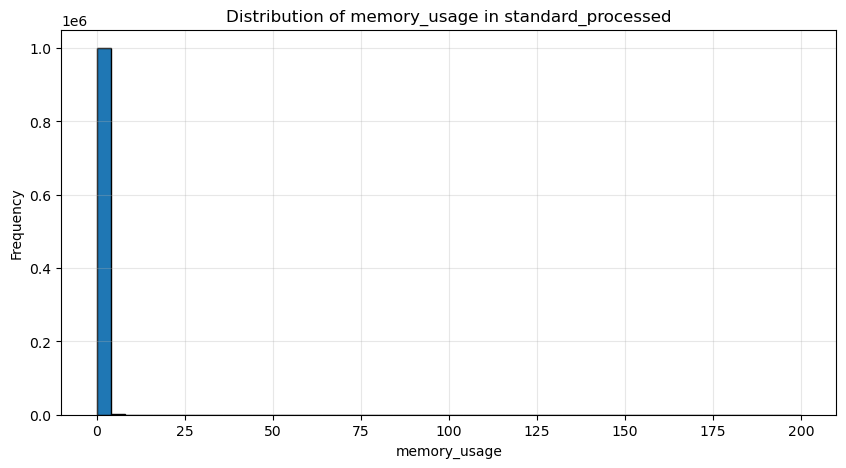

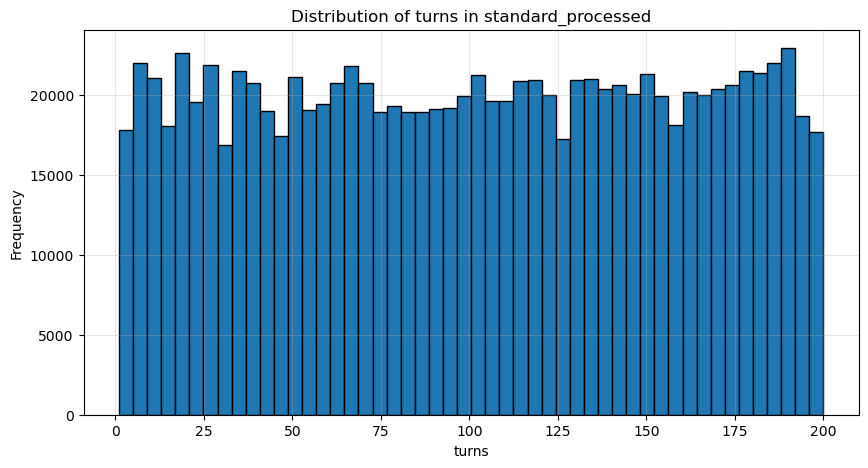

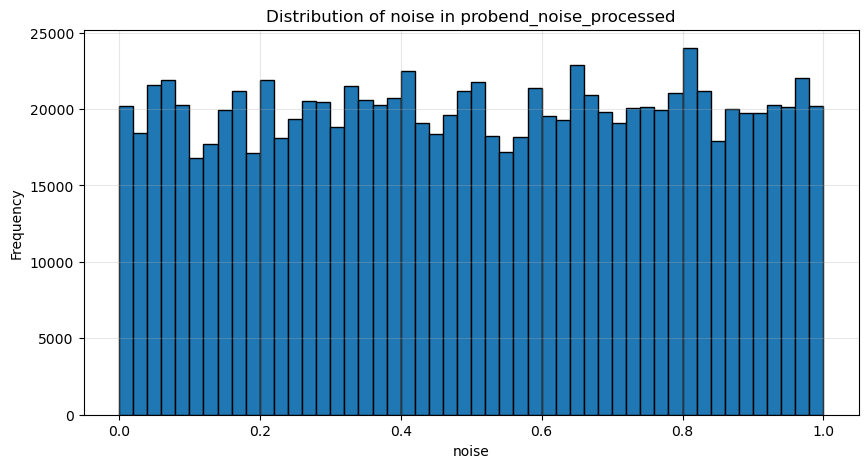

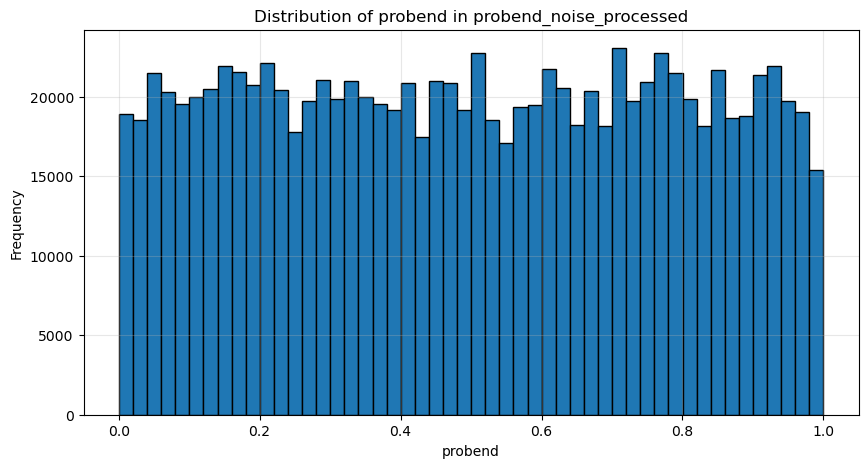

Comparing probend_processed and noise_processed:
Columns only in probend_processed:
{'probend'}

Columns only in noise_processed:
{'noise', 'memory_usage', 'turns'}




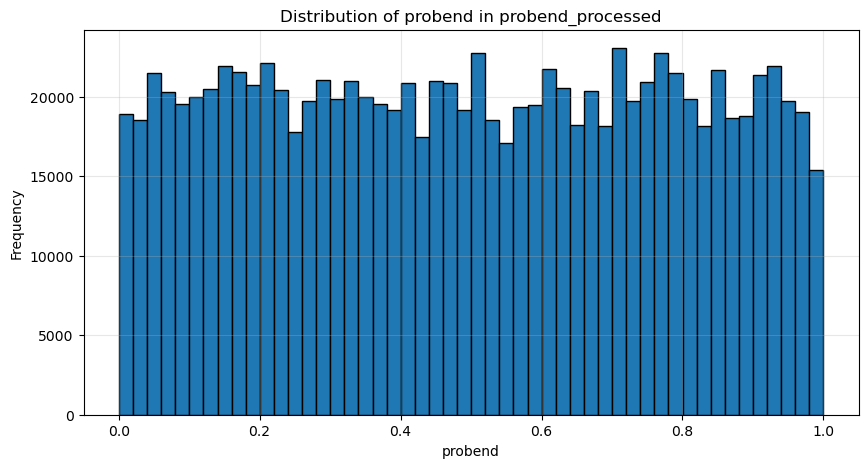

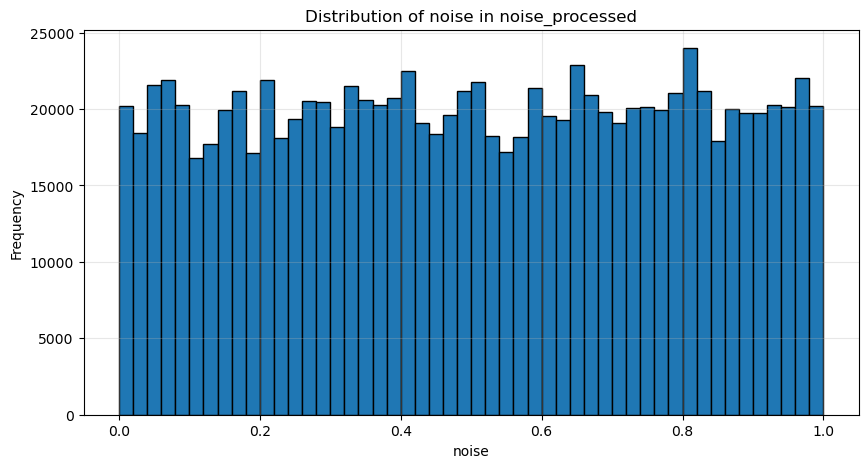

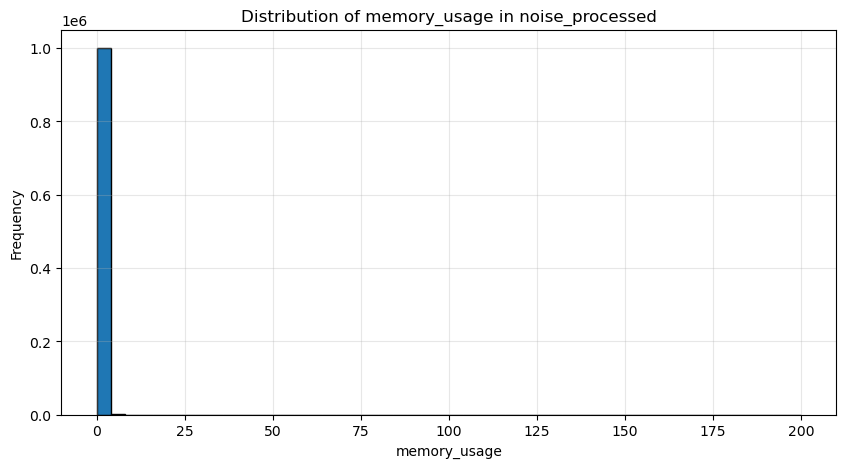

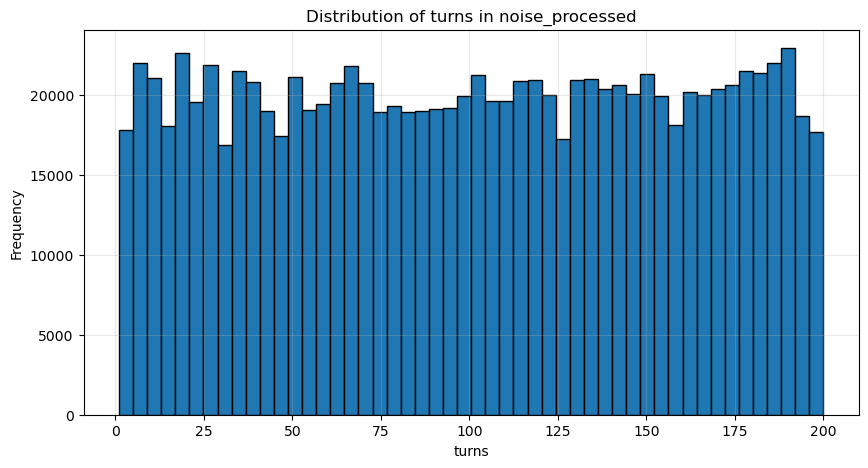

Comparing probend_processed and probend_noise_processed:
Columns only in probend_processed:
set()

Columns only in probend_noise_processed:
{'noise'}




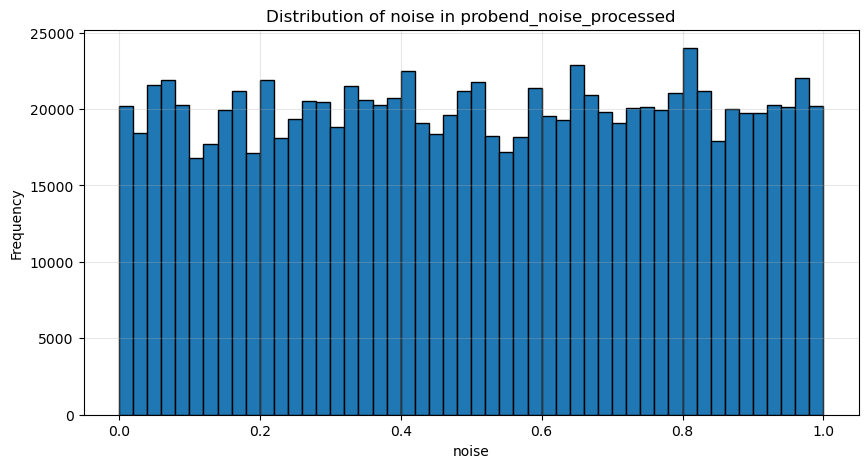

Comparing noise_processed and probend_noise_processed:
Columns only in noise_processed:
{'memory_usage', 'turns'}

Columns only in probend_noise_processed:
{'probend'}




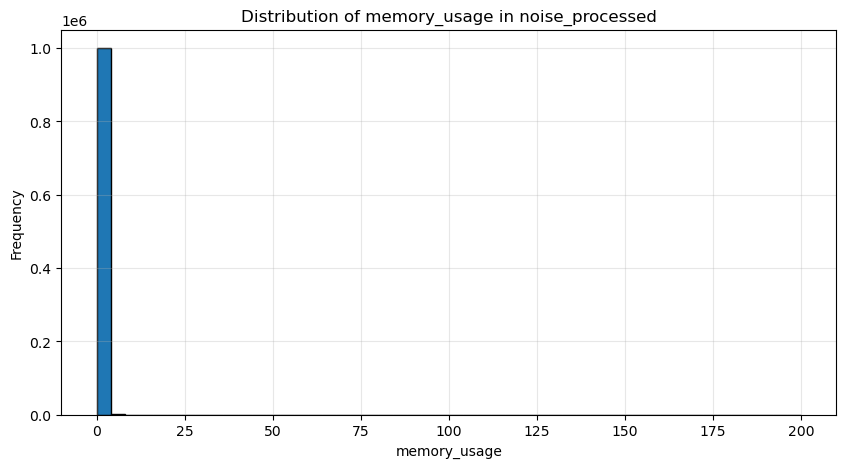

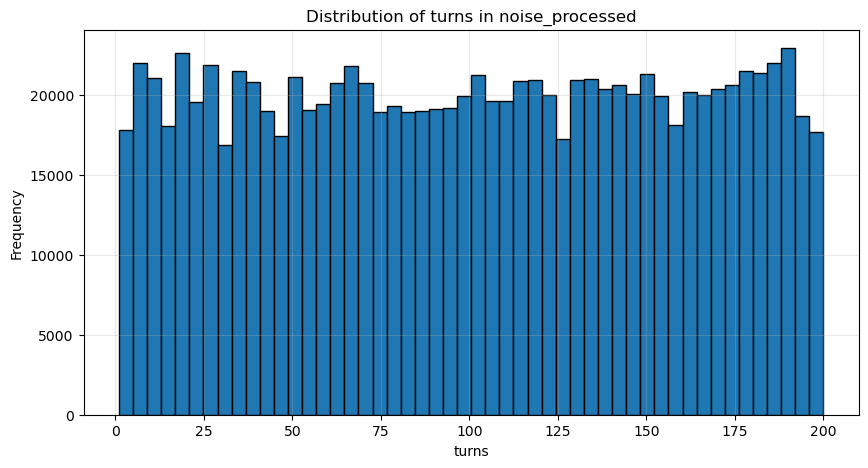

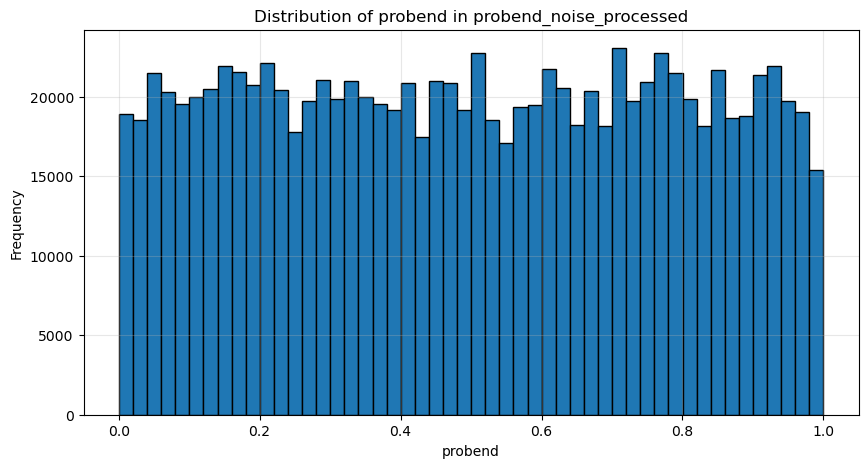

In [9]:
import matplotlib.pyplot as plt
# Function to get column differences and plot distributions
def get_column_differences_and_plot(df1: pl.DataFrame, df2: pl.DataFrame, df1_name: str, df2_name: str):
    df1_cols = set(df1.columns)
    df2_cols = set(df2.columns)
    
    only_in_df1 = df1_cols - df2_cols
    only_in_df2 = df2_cols - df1_cols
    
    print(f"Columns only in {df1_name}:")
    print(only_in_df1)
    print(f"\nColumns only in {df2_name}:")
    print(only_in_df2)
    print("\n")
    
    # Plot distributions for missing columns
    for col in only_in_df1:
        if col in df1.columns:
            plt.figure(figsize=(10, 5))
            df1[col].to_pandas().hist(bins=50, edgecolor='black')
            plt.title(f'Distribution of {col} in {df1_name}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(True, alpha=0.3)
            plt.show()
    
    for col in only_in_df2:
        if col in df2.columns:
            plt.figure(figsize=(10, 5))
            df2[col].to_pandas().hist(bins=50, edgecolor='black')
            plt.title(f'Distribution of {col} in {df2_name}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(True, alpha=0.3)
            plt.show()

# Compare datasets and plot distributions
print("Comparing standard_processed and probend_processed:")
get_column_differences_and_plot(dat_standard_processed, dat_probend_processed, "standard_processed", "probend_processed")

print("Comparing standard_processed and noise_processed:")
get_column_differences_and_plot(dat_standard_processed, dat_noise_processed, "standard_processed", "noise_processed")

print("Comparing standard_processed and probend_noise_processed:")
get_column_differences_and_plot(dat_standard_processed, dat_probend_noise_processed, "standard_processed", "probend_noise_processed")

print("Comparing probend_processed and noise_processed:")
get_column_differences_and_plot(dat_probend_processed, dat_noise_processed, "probend_processed", "noise_processed")

print("Comparing probend_processed and probend_noise_processed:")
get_column_differences_and_plot(dat_probend_processed, dat_probend_noise_processed, "probend_processed", "probend_noise_processed")

print("Comparing noise_processed and probend_noise_processed:")
get_column_differences_and_plot(dat_noise_processed, dat_probend_noise_processed, "noise_processed", "probend_noise_processed")


Now that we have an idea of which columns are missed in each 4 dataset, we can add these columns to the datasets that don't have them with a default value of NA or 0. But first, we need to see if we can set the default value to zero for any of them.

In [10]:
# Check minimum and maximum values of memory_usage, probend, noise, and turns in all datasets
datasets = [dat_standard_processed, dat_probend_processed, dat_noise_processed, dat_probend_noise_processed]
dataset_names = ["dat_standard_processed", "dat_probend_processed", "dat_noise_processed", "dat_probend_noise_processed"]
columns_to_check = ['memory_usage', 'probend', 'noise', 'turns']

for dataset, name in zip(datasets, dataset_names):
    print(f"{name}:")
    for column in columns_to_check:
        if column in dataset.columns:
            stats = dataset.select([
                pl.col(column).min().alias('min'),
                pl.col(column).max().alias('max')
            ])
            min_value = stats.select('min').item()
            max_value = stats.select('max').item()
            print(f"  {column.capitalize()}:")
            print(f"    Minimum value: {min_value}")
            print(f"    Maximum value: {max_value}")
        else:
            print(f"  {column.capitalize()} column does not exist in this dataset.")
    print()  # Add a blank line for readability between datasets


dat_standard_processed:
  Memory_usage:
    Minimum value: 0.0
    Maximum value: 200.0
  Probend column does not exist in this dataset.
  Noise column does not exist in this dataset.
  Turns:
    Minimum value: 1.0
    Maximum value: 200.0

dat_probend_processed:
  Memory_usage column does not exist in this dataset.
  Probend:
    Minimum value: 0.0002557293701938024
    Maximum value: 0.9999978568559492
  Noise column does not exist in this dataset.
  Turns column does not exist in this dataset.

dat_noise_processed:
  Memory_usage:
    Minimum value: 0.0
    Maximum value: 200.0
  Probend column does not exist in this dataset.
  Noise:
    Minimum value: 2.106765810538924e-05
    Maximum value: 0.9999987263048828
  Turns:
    Minimum value: 1.0
    Maximum value: 200.0

dat_probend_noise_processed:
  Memory_usage column does not exist in this dataset.
  Probend:
    Minimum value: 0.0002557293701938024
    Maximum value: 0.9999978568559492
  Noise:
    Minimum value: 2.1067658105389

In [11]:
# Add missing columns to dat_standard_processed
if "noise" not in dat_standard_processed.columns:
    dat_standard_processed = dat_standard_processed.with_columns(pl.lit(0).cast(pl.Float64).alias("noise"))
    print("Added 'noise' column to dat_standard_processed with default value 0")
if "probend" not in dat_standard_processed.columns:
    dat_standard_processed = dat_standard_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("probend"))
    print("Added 'probend' column to dat_standard_processed with default value None")
if "turns" not in dat_standard_processed.columns:
    dat_standard_processed = dat_standard_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("turns"))
    print("Added 'turns' column to dat_standard_processed with default value None")
if "memory_usage" not in dat_standard_processed.columns:
    dat_standard_processed = dat_standard_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("memory_usage"))
    print("Added 'memory_usage' column to dat_standard_processed with default value None")

print()  # Add a blank line for readability

# Add missing columns to dat_probend_processed
if "noise" not in dat_probend_processed.columns:
    dat_probend_processed = dat_probend_processed.with_columns(pl.lit(0).cast(pl.Float64).alias("noise"))
    print("Added 'noise' column to dat_probend_processed with default value 0")
if "turns" not in dat_probend_processed.columns:
    dat_probend_processed = dat_probend_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("turns"))
    print("Added 'turns' column to dat_probend_processed with default value None")
if "memory_usage" not in dat_probend_processed.columns:
    dat_probend_processed = dat_probend_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("memory_usage"))
    print("Added 'memory_usage' column to dat_probend_processed with default value None")

print()  # Add a blank line for readability

# Add missing columns to dat_noise_processed
if "probend" not in dat_noise_processed.columns:
    dat_noise_processed = dat_noise_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("probend"))
    print("Added 'probend' column to dat_noise_processed with default value None")
if "turns" not in dat_noise_processed.columns:
    dat_noise_processed = dat_noise_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("turns"))
    print("Added 'turns' column to dat_noise_processed with default value None")
if "memory_usage" not in dat_noise_processed.columns:
    dat_noise_processed = dat_noise_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("memory_usage"))
    print("Added 'memory_usage' column to dat_noise_processed with default value None")

print()  # Add a blank line for readability

# Add missing columns to dat_probend_noise_processed
if "turns" not in dat_probend_noise_processed.columns:
    dat_probend_noise_processed = dat_probend_noise_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("turns"))
    print("Added 'turns' column to dat_probend_noise_processed with default value None")
if "memory_usage" not in dat_probend_noise_processed.columns:
    dat_probend_noise_processed = dat_probend_noise_processed.with_columns(pl.lit(None).cast(pl.Float64).alias("memory_usage"))
    print("Added 'memory_usage' column to dat_probend_noise_processed with default value None")

print()  # Add a blank line for readability

# Verify the changes
datasets = [dat_standard_processed, dat_probend_processed, dat_noise_processed, dat_probend_noise_processed]
dataset_names = ["dat_standard_processed", "dat_probend_processed", "dat_noise_processed", "dat_probend_noise_processed"]
reference_columns = set(datasets[0].columns)
all_match = all(set(dataset.columns) == reference_columns for dataset in datasets)
print(f"All datasets have matching columns: {all_match}")

if not all_match:
    print("Datasets that don't match:")
    for i, dataset in enumerate(datasets):
        if set(dataset.columns) != reference_columns:
            print(f"- {dataset_names[i]}")
            print(f"  Missing columns: {reference_columns - set(dataset.columns)}")
            print(f"  Extra columns: {set(dataset.columns) - reference_columns}")


Added 'noise' column to dat_standard_processed with default value 0
Added 'probend' column to dat_standard_processed with default value None

Added 'noise' column to dat_probend_processed with default value 0
Added 'turns' column to dat_probend_processed with default value None
Added 'memory_usage' column to dat_probend_processed with default value None

Added 'probend' column to dat_noise_processed with default value None

Added 'turns' column to dat_probend_noise_processed with default value None
Added 'memory_usage' column to dat_probend_noise_processed with default value None

All datasets have matching columns: True


In [12]:
# Reorder columns to ensure consistency across all datasets
column_order = ['Rank', 'Name', 'Median_score', 'Cooperation_rating', 'Wins', 'Initial_C_rate', 'CC_rate', 'CD_rate', 'DC_rate', 'DD_rate', 'CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate', 'turns', 'repetitions', 'size', 'seed', 'Normalized_Rank', 'SSE', 'cluster_on_0.05', 'cluster_on_0.25', 'cluster_on_0.5', 'Stochastic', 'Memory_depth', 'Makes_use_of_game', 'Makes_use_of_length', 'Cooperation_rating_max', 'Cooperation_rating_min', 'Cooperation_rating_median', 'Cooperation_rating_mean', 'Cooperation_rating_comp_to_max', 'Cooperation_rating_comp_to_min', 'Cooperation_rating_comp_to_median', 'Cooperation_rating_comp_to_mean', 'memory_usage', 'noise', 'probend']

dat_standard_processed = dat_standard_processed[column_order]
dat_probend_processed = dat_probend_processed[column_order]
dat_noise_processed = dat_noise_processed[column_order]
dat_probend_noise_processed = dat_probend_noise_processed[column_order]

In [13]:
combined_df = pl.concat([dat_standard_processed, dat_probend_processed, dat_noise_processed, dat_probend_noise_processed])

In [14]:
# Combine all datasets into one
combined_df = pl.concat([dat_standard_processed, dat_probend_processed, dat_noise_processed, dat_probend_noise_processed])

# Add binary columns for noise and probend
combined_df = combined_df.with_columns([
    (pl.col('noise') != 0).cast(pl.Int32).alias('has_noise'),
    pl.col('probend').is_not_null().cast(pl.Int32).alias('has_probend')
])

# Verify the new dataset
print("Combined dataset shape:", combined_df.shape)
print("\nFirst few rows of the combined dataset:")
print(combined_df.head())
print("\nValue counts for 'has_noise':")
print(combined_df.group_by('has_noise').count().sort('count', descending=True))
print("\nValue counts for 'has_probend':")
print(combined_df.group_by('has_probend').count().sort('count', descending=True))


Combined dataset shape: (4011653, 40)

First few rows of the combined dataset:
shape: (5, 40)
┌──────┬──────────────┬──────────────┬─────────────┬───┬───────┬─────────┬───────────┬─────────────┐
│ Rank ┆ Name         ┆ Median_score ┆ Cooperation ┆ … ┆ noise ┆ probend ┆ has_noise ┆ has_probend │
│ ---  ┆ ---          ┆ ---          ┆ _rating     ┆   ┆ ---   ┆ ---     ┆ ---       ┆ ---         │
│ i64  ┆ str          ┆ f64          ┆ ---         ┆   ┆ f64   ┆ f64     ┆ i32       ┆ i32         │
│      ┆              ┆              ┆ f64         ┆   ┆       ┆         ┆           ┆             │
╞══════╪══════════════╪══════════════╪═════════════╪═══╪═══════╪═════════╪═══════════╪═════════════╡
│ 0    ┆ EvolvedLooke ┆ 2.969925     ┆ 0.704614    ┆ … ┆ 0.0   ┆ null    ┆ 0         ┆ 0           │
│      ┆ rUp2_2_2     ┆              ┆             ┆   ┆       ┆         ┆           ┆             │
│ 1    ┆ Evolved FSM  ┆ 2.874888     ┆ 0.6968      ┆ … ┆ 0.0   ┆ null    ┆ 0         ┆ 0          

C:\Users\Amin Kharaghani\AppData\Local\Temp\ipykernel_82916\1989443800.py:15: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  print(combined_df.group_by('has_noise').count().sort('count', descending=True))
C:\Users\Amin Kharaghani\AppData\Local\Temp\ipykernel_82916\1989443800.py:17: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  print(combined_df.group_by('has_probend').count().sort('count', descending=True))


In [15]:
# Check mean probend for has_probend == 1 and has_probend == 0
mean_probend_1 = combined_df.filter(pl.col('has_probend') == 1)['probend'].mean()
mean_probend_0 = combined_df.filter(pl.col('has_probend') == 0)['probend'].mean()

print("Mean probend when has_probend == 1:", mean_probend_1)
print("Mean probend when has_probend == 0:", mean_probend_0)

# Check mean noise for has_noise == 1 and has_noise == 0
mean_noise_1 = combined_df.filter(pl.col('has_noise') == 1)['noise'].mean()
mean_noise_0 = combined_df.filter(pl.col('has_noise') == 0)['noise'].mean()

print("\nMean noise when has_noise == 1:", mean_noise_1)
print("Mean noise when has_noise == 0:", mean_noise_0)


Mean probend when has_probend == 1: 0.49791648784366405
Mean probend when has_probend == 0: None

Mean noise when has_noise == 1: 0.5034985074717377
Mean noise when has_noise == 0: 0.0


In [16]:
# Save the combined dataset as a CSV file in the Data folder
combined_df.write_csv("./Data/combined_dataset.csv")

print("Combined dataset saved as 'combined_dataset.csv' in the Data folder.")


Combined dataset saved as 'combined_dataset.csv' in the Data folder.


# 2) Modelling

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib


c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# Read the combined dataset using pandas
combined_df = pd.read_csv("./Data/combined_dataset.csv")

# Display basic information about the dataset
print("Dataset shape:", combined_df.shape)
print("\nColumn names:")
print(combined_df.columns)
print("\nData types:")
print(combined_df.dtypes)
print("\nFirst few rows:")
print(combined_df.head())


Dataset shape: (4011653, 40)

Column names:
Index(['Rank', 'Name', 'Median_score', 'Cooperation_rating', 'Wins',
       'Initial_C_rate', 'CC_rate', 'CD_rate', 'DC_rate', 'DD_rate',
       'CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate', 'turns',
       'repetitions', 'size', 'seed', 'Normalized_Rank', 'SSE',
       'cluster_on_0.05', 'cluster_on_0.25', 'cluster_on_0.5', 'Stochastic',
       'Memory_depth', 'Makes_use_of_game', 'Makes_use_of_length',
       'Cooperation_rating_max', 'Cooperation_rating_min',
       'Cooperation_rating_median', 'Cooperation_rating_mean',
       'Cooperation_rating_comp_to_max', 'Cooperation_rating_comp_to_min',
       'Cooperation_rating_comp_to_median', 'Cooperation_rating_comp_to_mean',
       'memory_usage', 'noise', 'probend', 'has_noise', 'has_probend'],
      dtype='object')

Data types:
Rank                                   int64
Name                                  object
Median_score                         float64
Cooperation_

In [26]:
# Load your data and convert to pandas DataFrame
df = combined_df.copy() 

# Replace inf values with 999 and remove rows with NA
df = df.replace([np.inf, -np.inf], 999)
print(df.head())

# Define features and target
features = [
    'CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate',
    'Cooperation_rating',
    'Cooperation_rating_max','Cooperation_rating_min',
    'Cooperation_rating_median','Cooperation_rating_mean',
    'Cooperation_rating_comp_to_max','Cooperation_rating_comp_to_min',
    'Cooperation_rating_comp_to_median','Cooperation_rating_comp_to_mean',
    'size', 'repetitions', 'turns',
    'noise','probend',
    'Makes_use_of_game', 'Makes_use_of_length',
    'SSE','Stochastic','memory_usage',
    'has_noise', 'has_probend'
]

target = 'Rank'

# Function to create and evaluate model
def create_and_evaluate_model(X, y, model_name):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return model, {'Model': model_name, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'Train Size': len(X_train), 'Test Size': len(X_test)}

# Create and evaluate models for different combinations
models = {}
results = []

# Model 1: All data
df_all = df
X = df_all[features]  
y = df_all[target]
models['model_all'], result = create_and_evaluate_model(X, y, 'All Data')
results.append(result)

# Model 2: has_noise == 1 and has_probend == 1
df_noise_probend = df[(df['has_noise'] == 1) & (df['has_probend'] == 1)]
X = df_noise_probend[features]  
y = df_noise_probend[target]
models['model_has_noise_has_probend'], result = create_and_evaluate_model(X, y, 'Has Noise and Probend')
results.append(result)

# Model 3: has_noise == 1
df_has_noise = df[df['has_noise'] == 1]
X = df_has_noise[features]
y = df_has_noise[target]
models['model_has_noise'], result = create_and_evaluate_model(X, y, 'Has Noise')
results.append(result)

# Model 4: has_probend == 1
df_has_probend = df[df['has_probend'] == 1]
X = df_has_probend[features]
y = df_has_probend[target]
models['model_has_probend'], result = create_and_evaluate_model(X, y, 'Has Probend')
results.append(result)

# Model 5: has_noise == 0 and has_probend == 0
df_no_noise_no_probend = df[(df['has_noise'] == 0) & (df['has_probend'] == 0)]
X = df_no_noise_no_probend[features]
y = df_no_noise_no_probend[target]
models['model_no_noise_no_probend'], result = create_and_evaluate_model(X, y, 'No Noise, No Probend')
results.append(result)

# Model 6: has_noise == 0 and has_probend == 1
df_no_noise_has_probend = df[(df['has_noise'] == 0) & (df['has_probend'] == 1)]
X = df_no_noise_has_probend[features]
y = df_no_noise_has_probend[target]
models['model_no_noise_has_probend'], result = create_and_evaluate_model(X, y, 'No Noise, Has Probend')
results.append(result)

# Model 7: has_noise == 1 and has_probend == 0
df_has_noise_no_probend = df[(df['has_noise'] == 1) & (df['has_probend'] == 0)]
X = df_has_noise_no_probend[features]
y = df_has_noise_no_probend[target]
models['model_has_noise_no_probend'], result = create_and_evaluate_model(X, y, 'Has Noise, No Probend')
results.append(result)

# Create and display results table
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')
print("\nModel Evaluation Results:")
print(results_df.to_string())

# Save results table to CSV file in Models folder
results_csv_path = "./Models/model_evaluation_results.csv"
results_df.to_csv(results_csv_path)
print(f"\nSaved model evaluation results to {results_csv_path}")

# Save models
for name, model in models.items():
    filename = f"./Models/{name}.pkl"
    joblib.dump(model, filename)
    print(f"\nSaved {name} to {filename}")


   Rank                     Name  Median_score  Cooperation_rating  Wins  \
0     0     EvolvedLookerUp2_2_2      2.969925            0.704614  28.0   
1     1  Evolved FSM 16 Noise 05      2.874888            0.696800  21.0   
2     2        PSO Gambler 1_1_1      2.874216            0.684317  23.0   
3     3         PSO Gambler Mem1      2.861493            0.705582  23.0   
4     4                 Winner12      2.834701            0.681854  20.0   

   Initial_C_rate   CC_rate   CD_rate   DC_rate   DD_rate  ...  \
0             1.0  0.639084  0.065530  0.189481  0.105905  ...   
1             1.0  0.676353  0.020448  0.135146  0.168054  ...   
2             1.0  0.650701  0.033616  0.151543  0.164140  ...   
3             1.0  0.663295  0.042287  0.144599  0.149819  ...   
4             1.0  0.650588  0.031267  0.140920  0.177226  ...   

   Cooperation_rating_mean  Cooperation_rating_comp_to_max  \
0                  0.60628                        0.729305   
1                  0.6

c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample


Model Evaluation Results:
                              MSE        MAE       RMSE        R2  Train Size  Test Size
Model                                                                                   
All Data               149.832575   8.008418  12.240612  0.923120     3209322     802331
Has Noise and Probend  279.441761  11.024551  16.716512  0.855864      802360     200590
Has Noise              183.571409   8.399821  13.548853  0.905829     1604720     401180
Has Probend            199.477647   9.178073  14.123656  0.897669     1604720     401180
No Noise, No Probend    36.448440   4.355874   6.037254  0.981291      802242     200561
No Noise, Has Probend   98.996734   6.585569   9.949710  0.948937      802360     200590
Has Noise, No Probend   68.852818   5.098850   8.297760  0.964486      802360     200590

Saved model evaluation results to ./Models/model_evaluation_results.csv

Saved model_all to ./Models/model_all.pkl

Saved model_has_noise_has_probend to ./Models/model_has

In [24]:
print(model_name)
X = df[(df['has_noise'] == 0) & (df['has_probend'] == 1)][features]
# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

model_no_noise_no_probend


c:\Users\Amin Kharaghani\miniconda3\envs\dev_env1\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


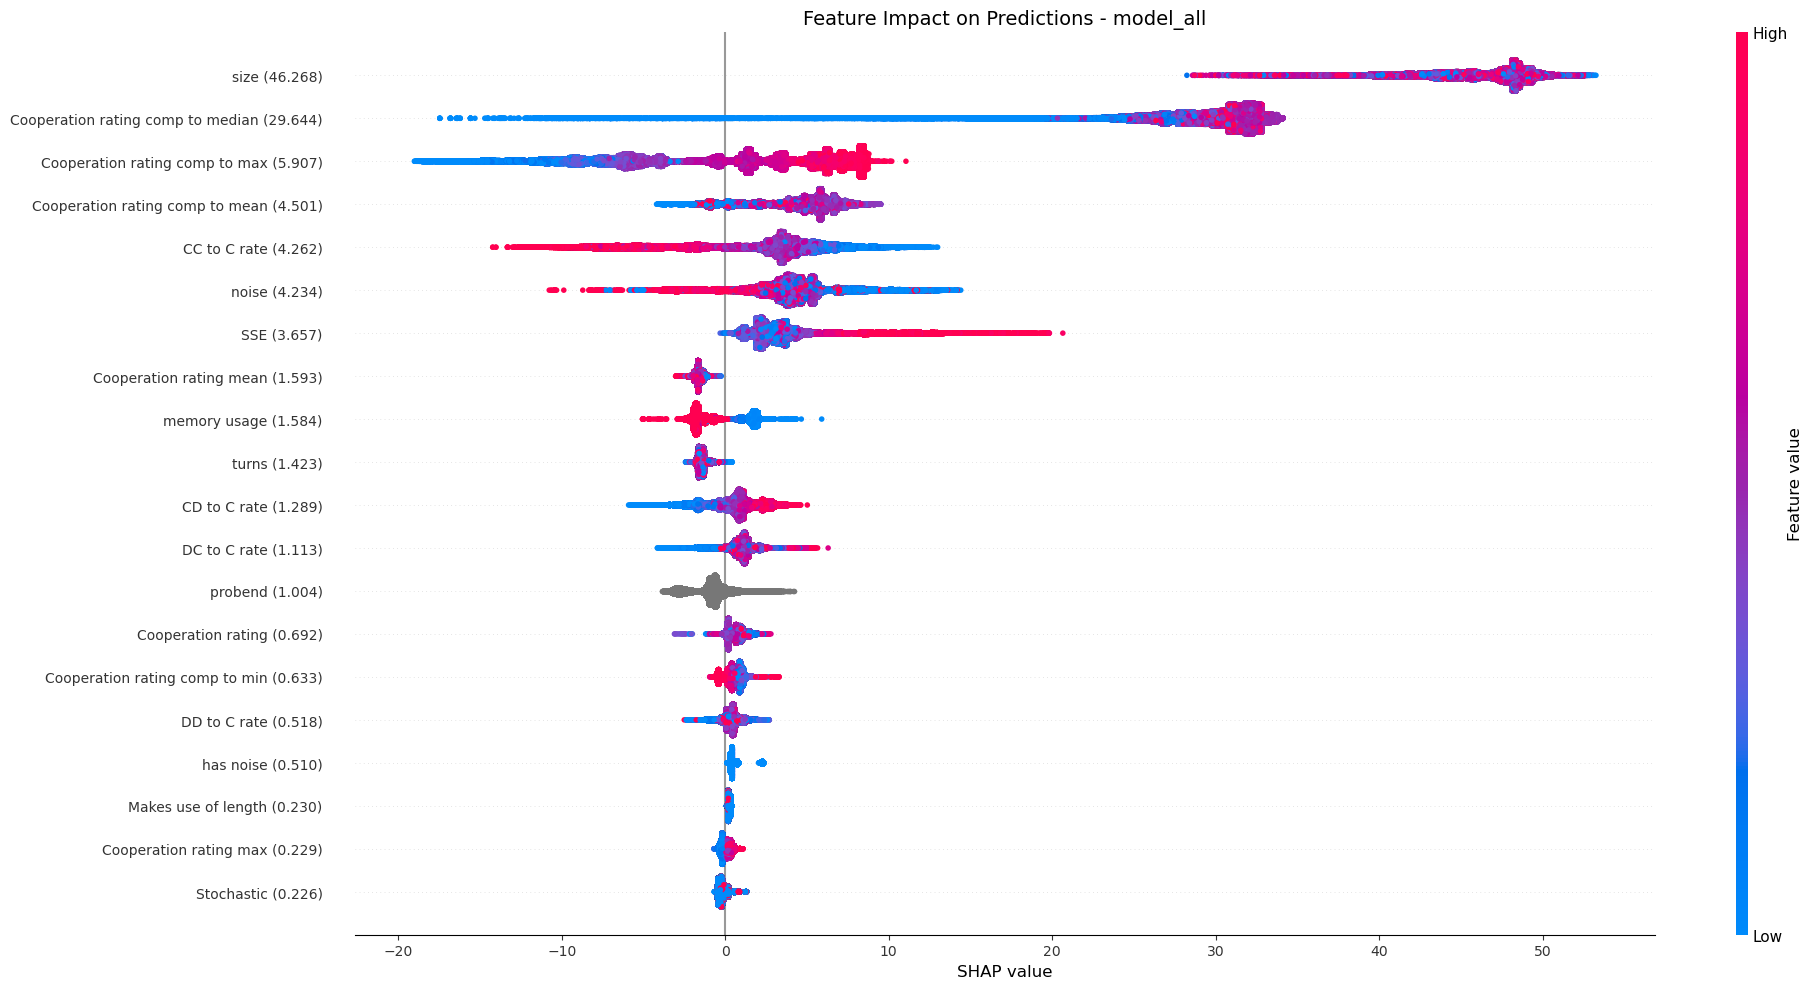

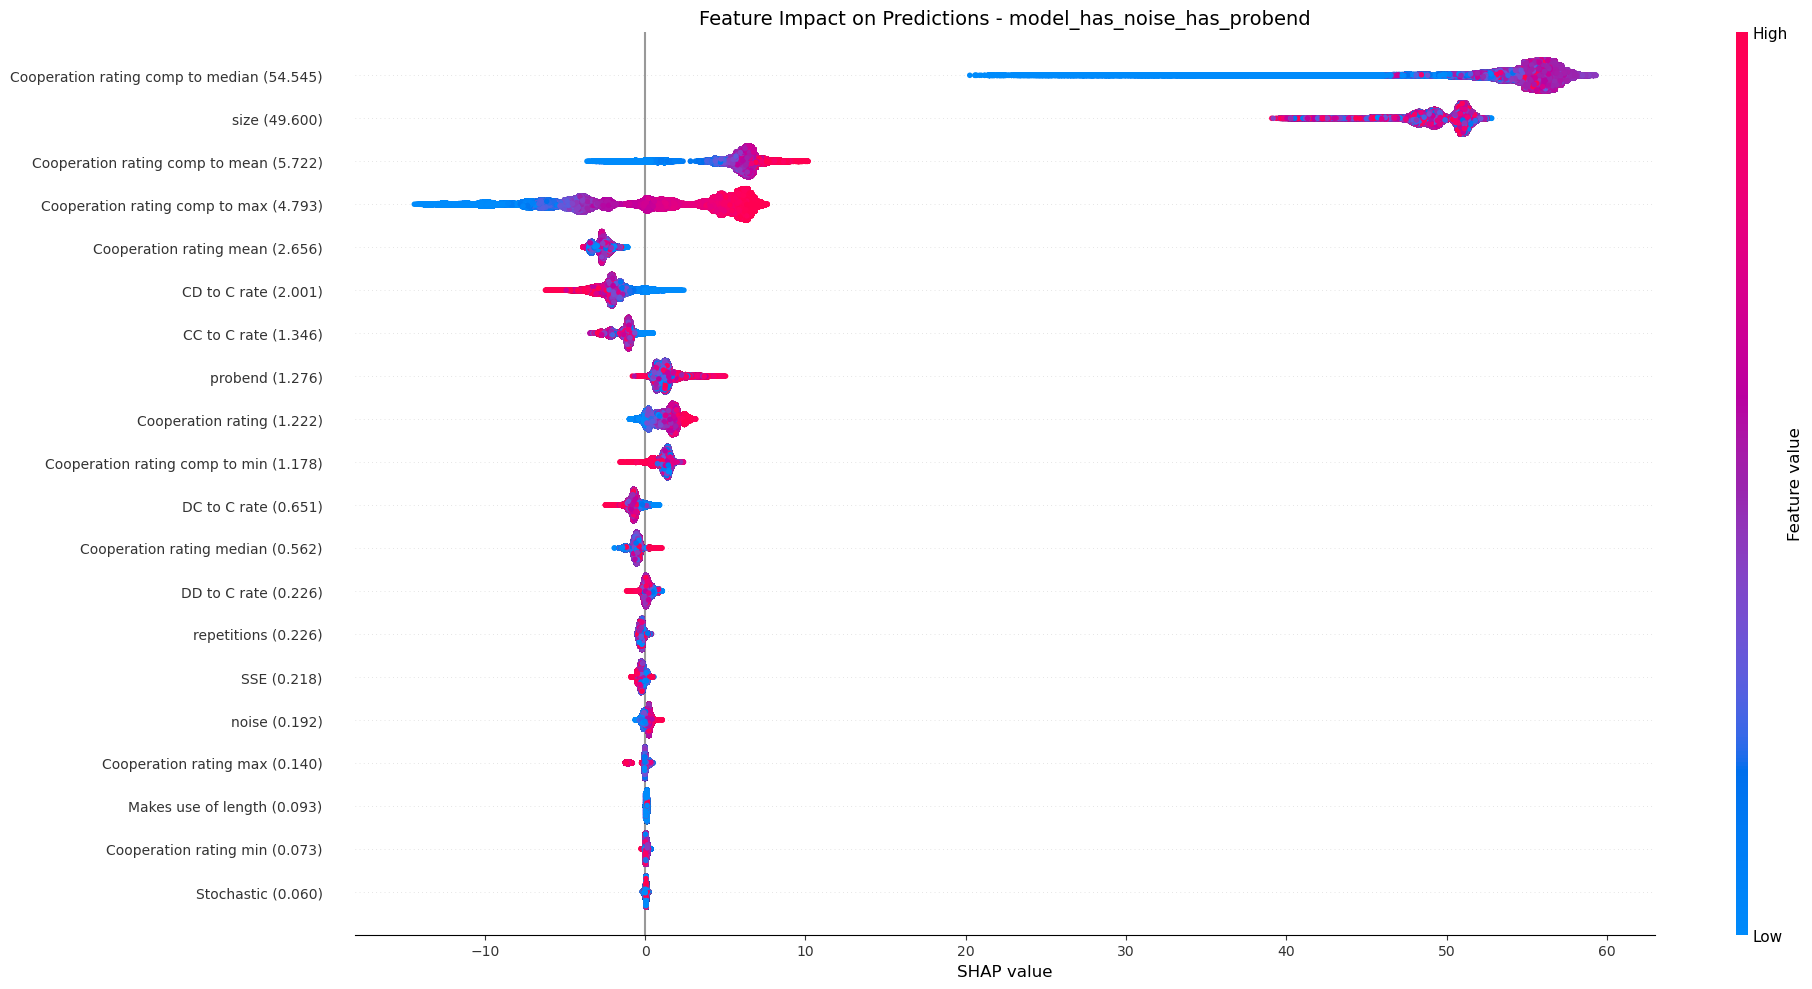

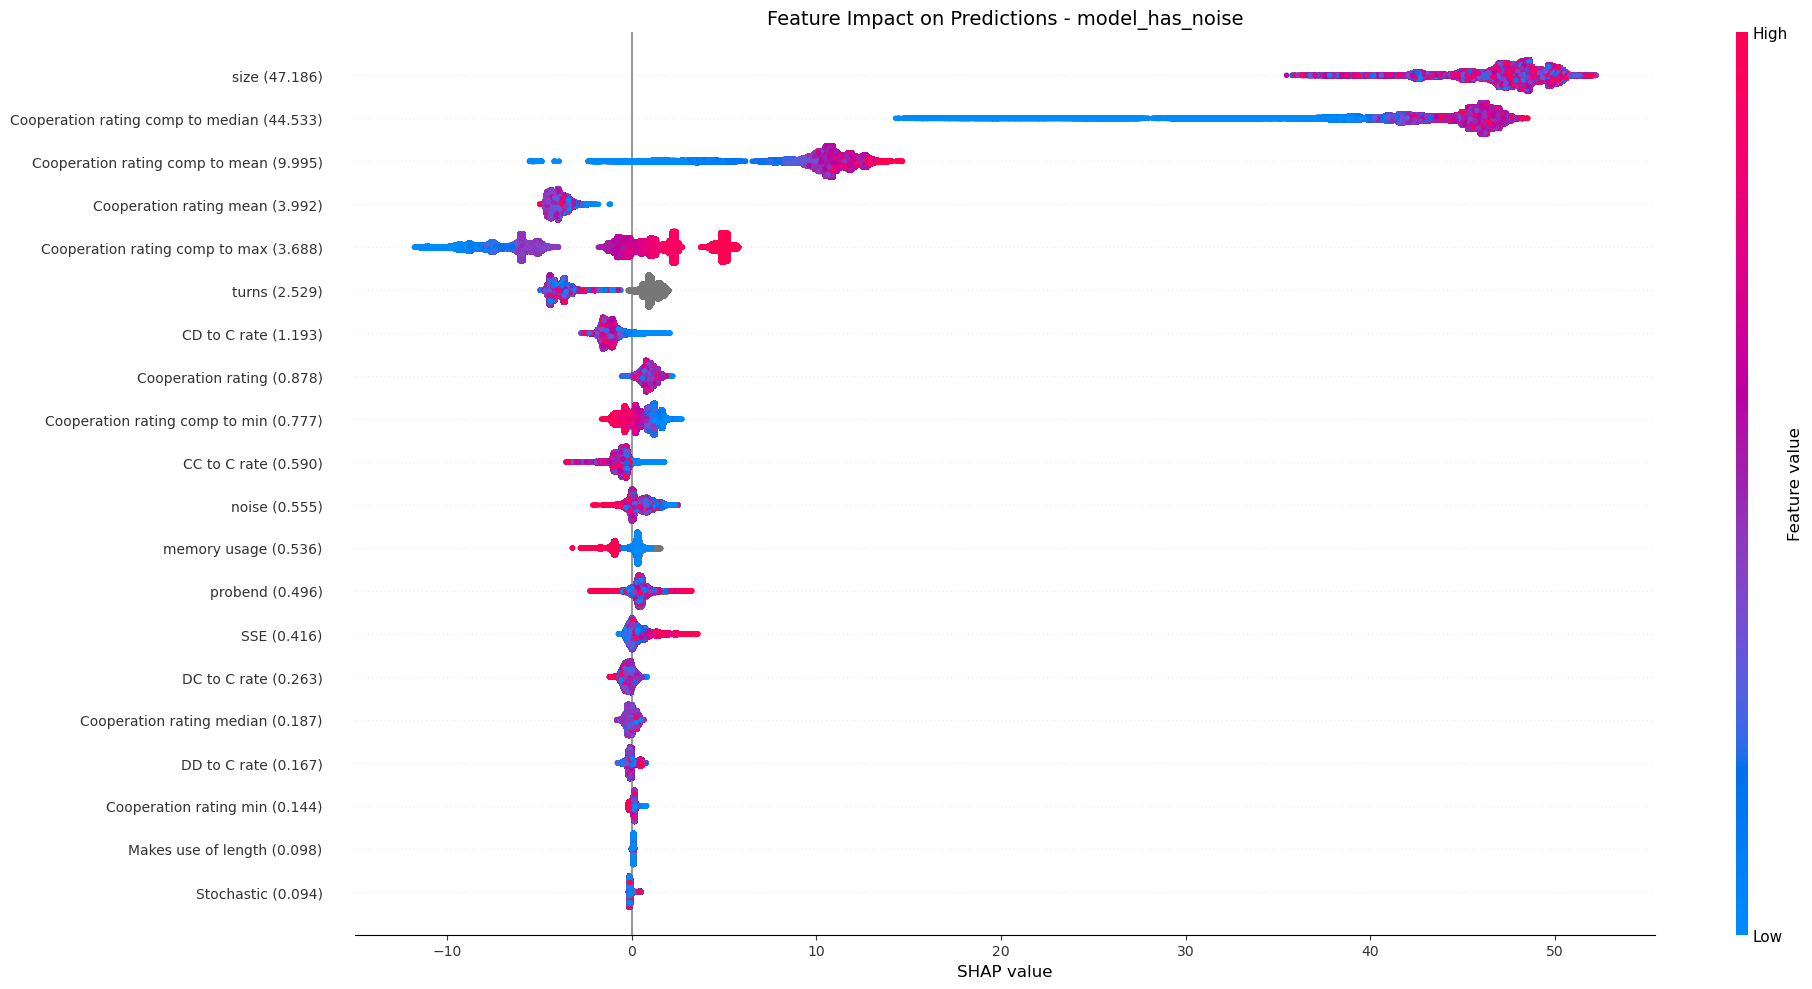

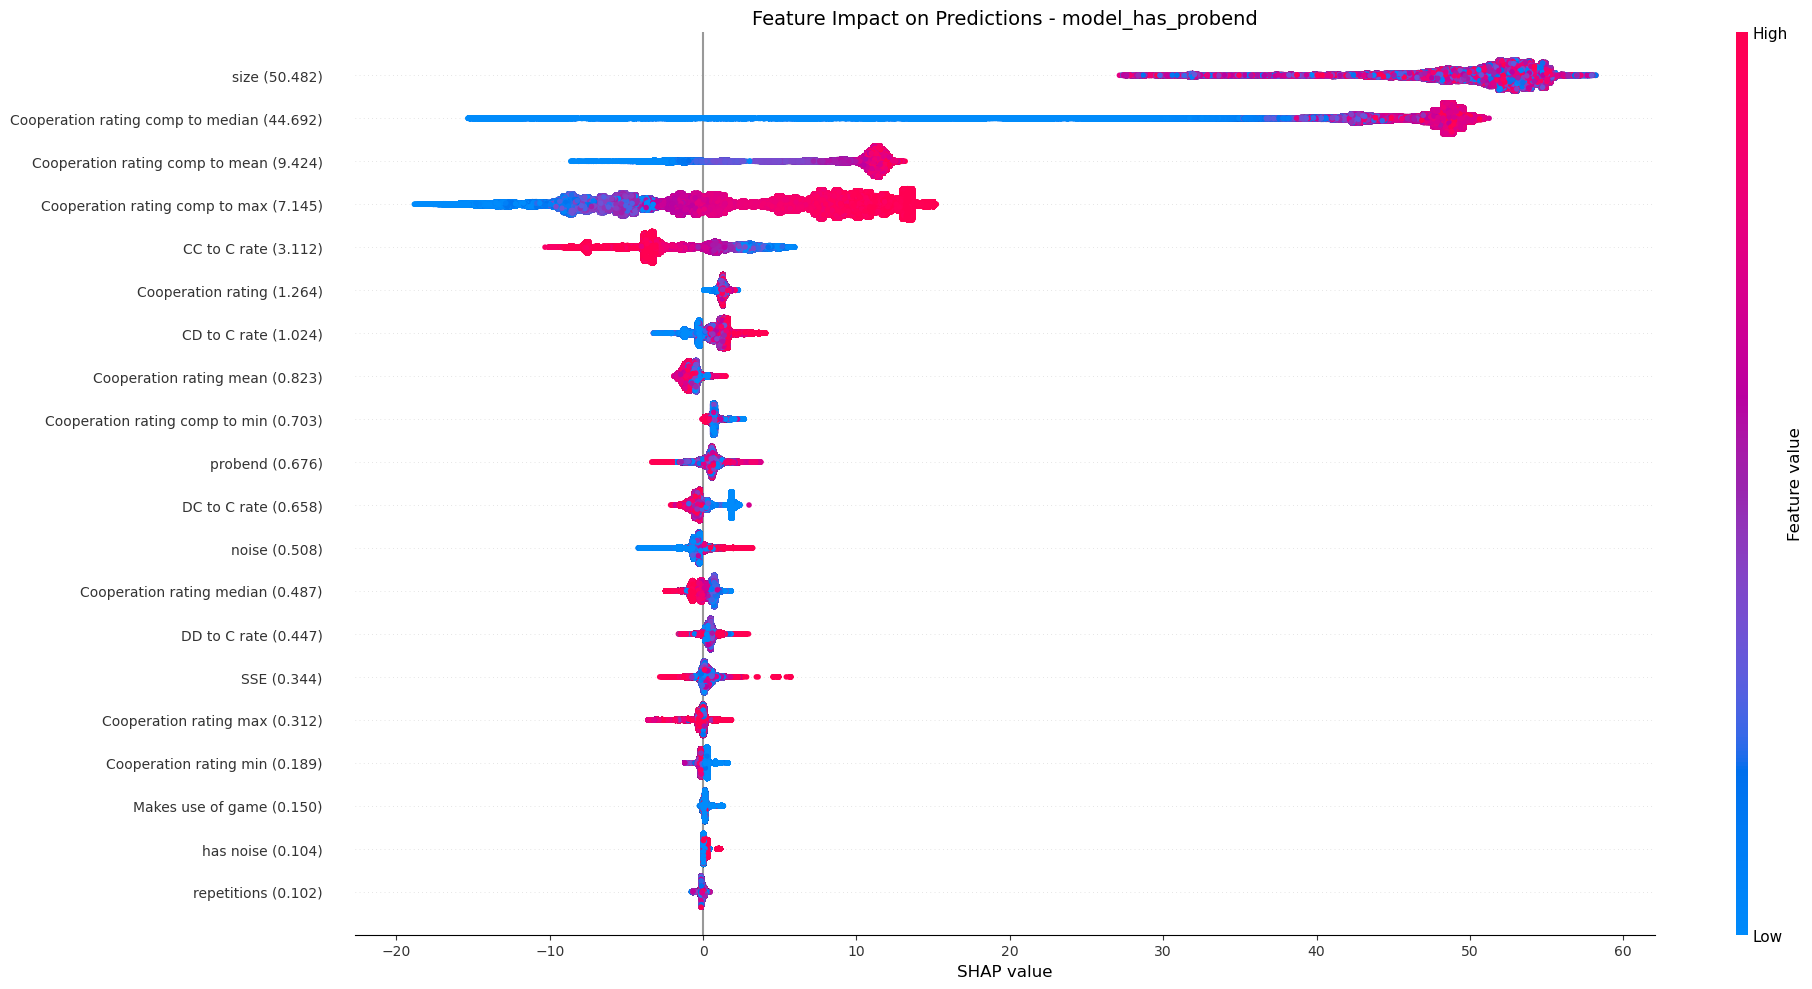

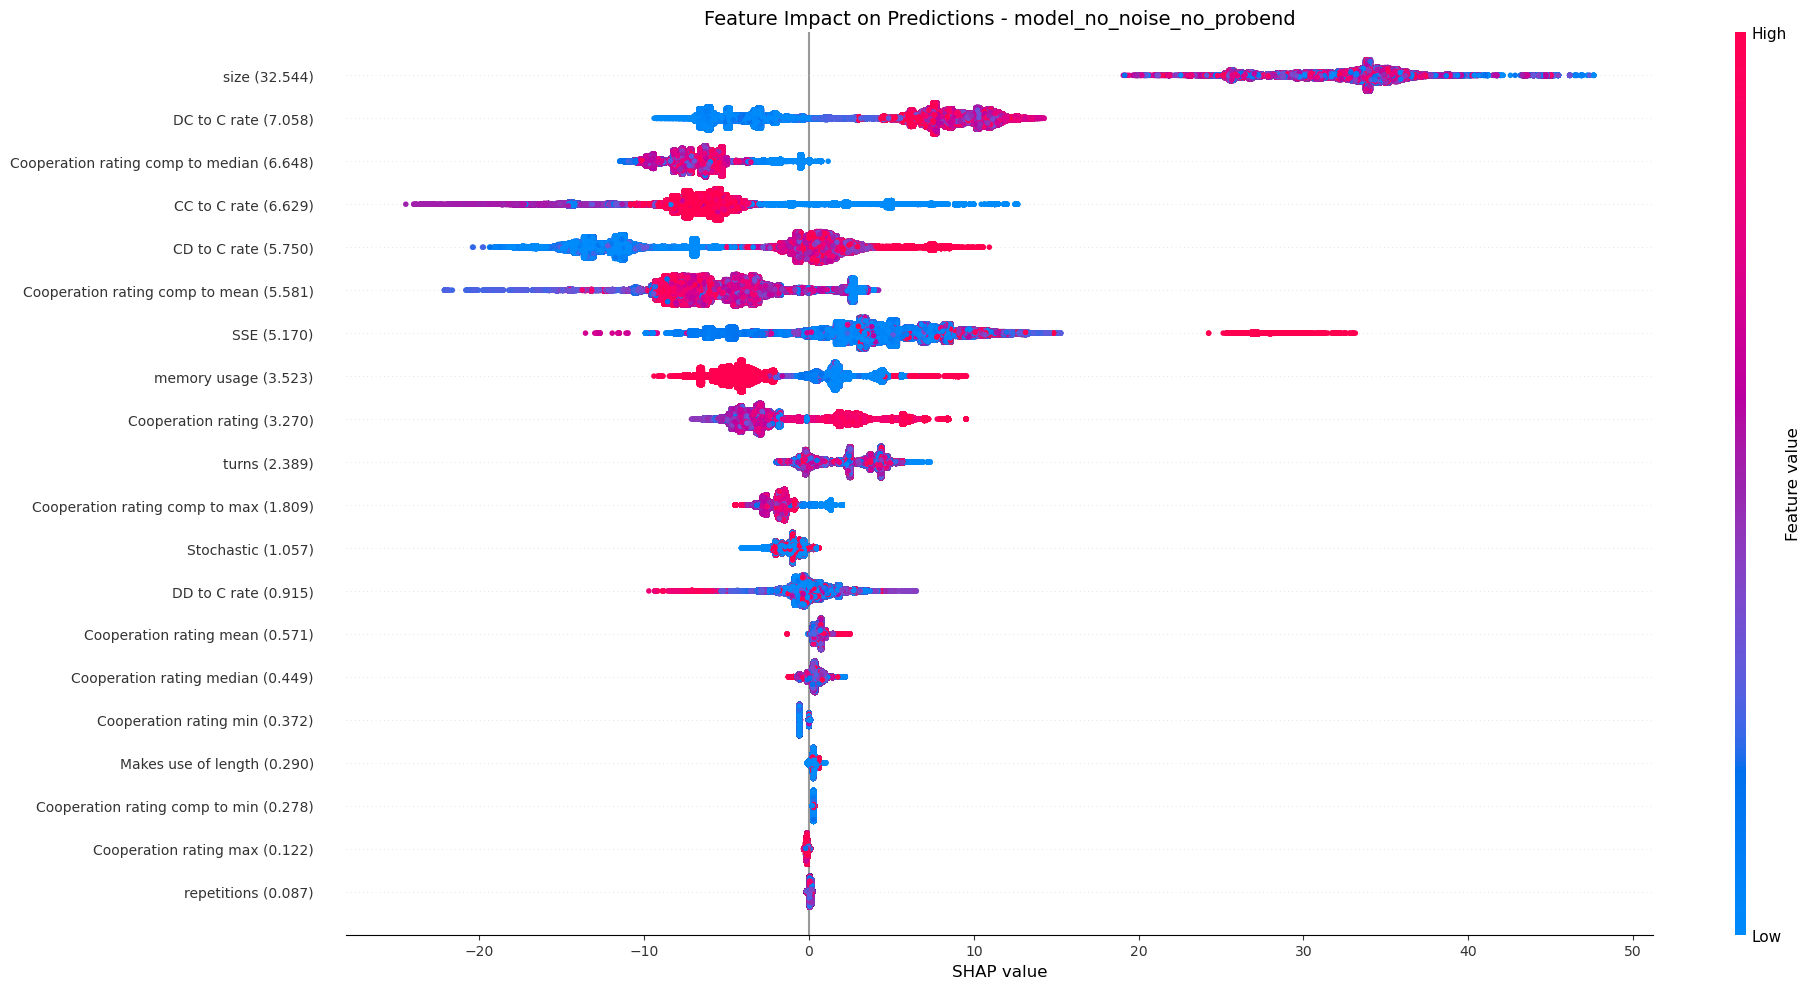

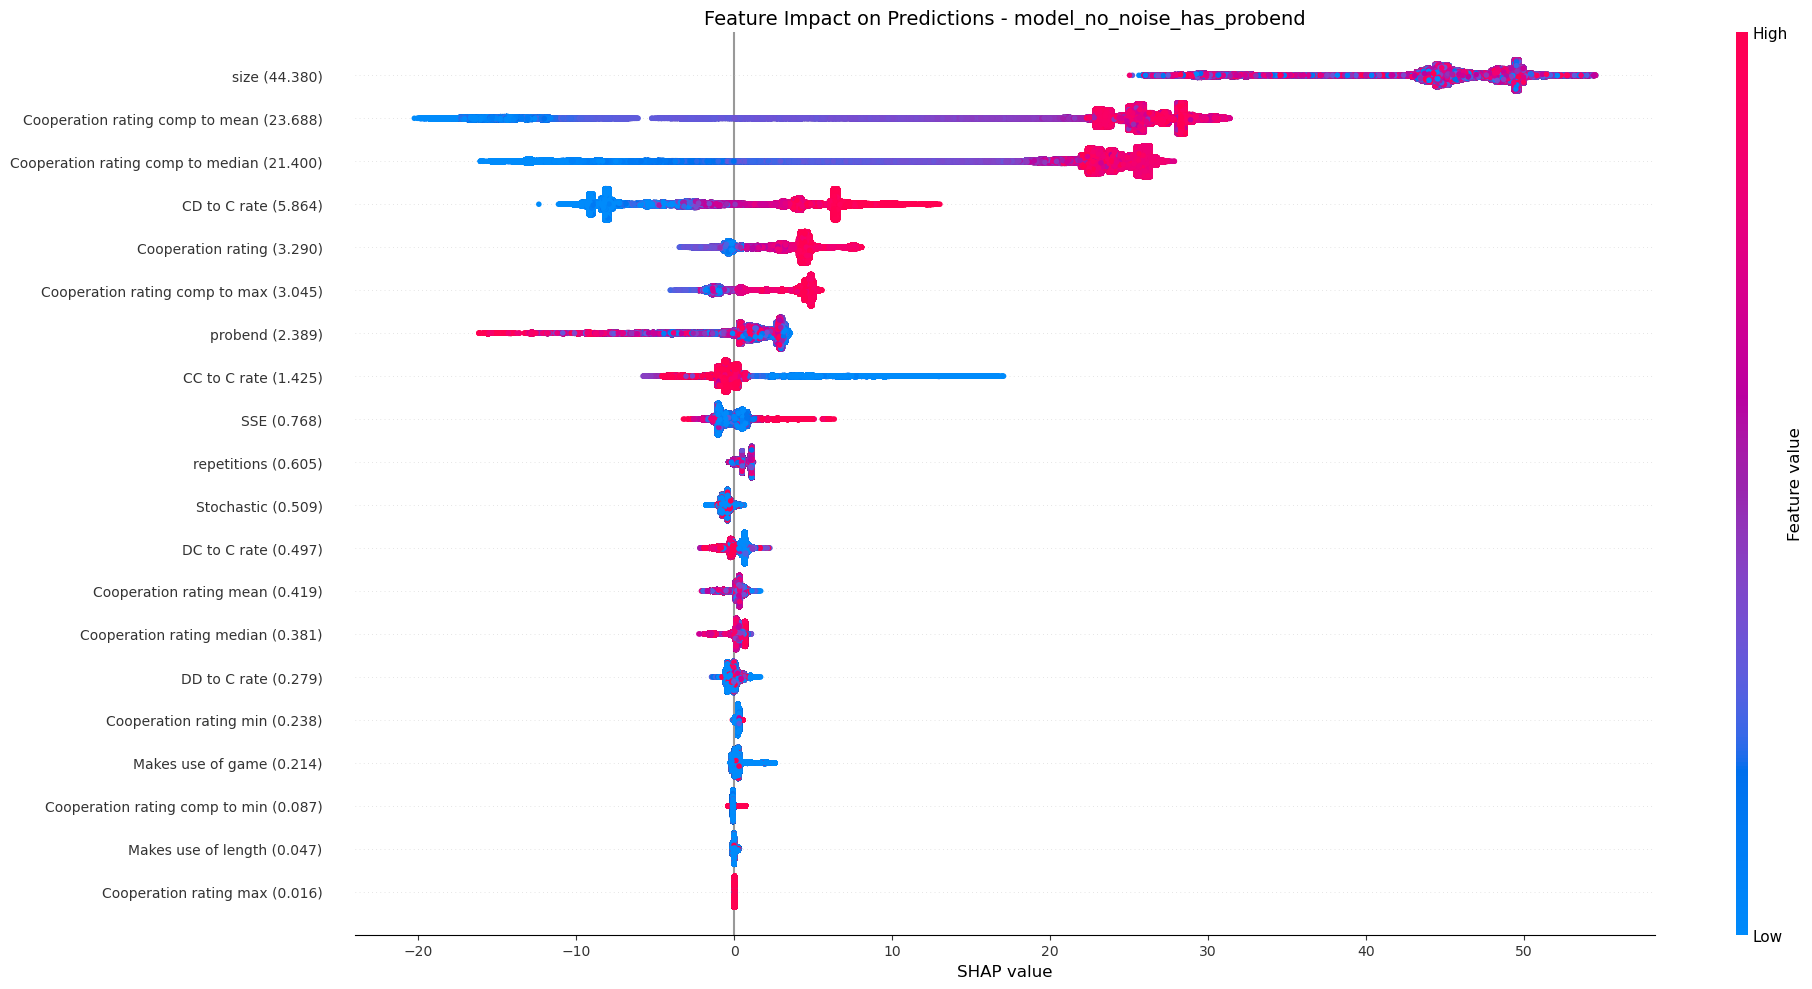

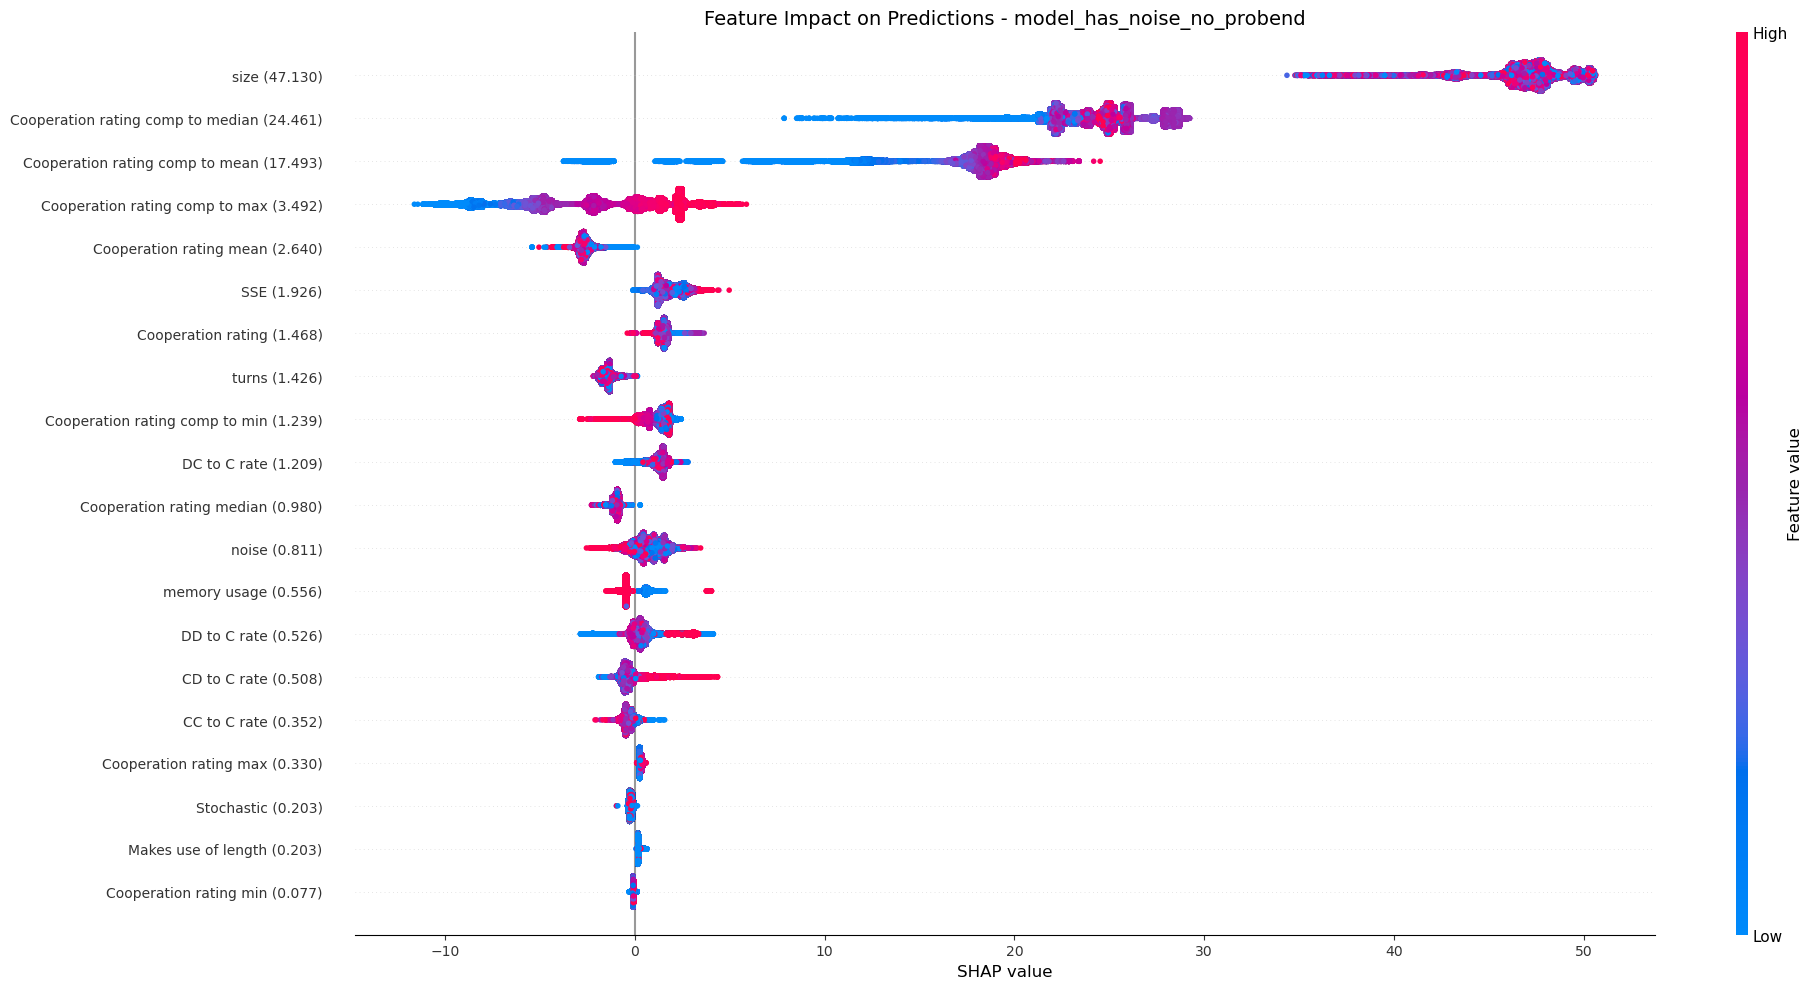

In [27]:
# Calculate and plot SHAP values for all 6 models
for model_name, model in models.items():
    # Get the corresponding dataset
    if model_name == 'model_alld':
        X = df[features]
    elif model_name == 'model_has_noise_has_probend':
        X = df[(df['has_noise'] == 1) & (df['has_probend'] == 1)][features]
    elif model_name == 'model_has_noise':
        X = df[df['has_noise'] == 1][features]
    elif model_name == 'model_has_probend':
        X = df[df['has_probend'] == 1][features]
    elif model_name == 'model_no_noise_no_probend':
        X = df[(df['has_noise'] == 0) & (df['has_probend'] == 0)][features]
    elif model_name == 'model_no_noise_has_probend':
        X = df[(df['has_noise'] == 0) & (df['has_probend'] == 1)][features]
    elif model_name == 'model_has_noise_no_probend':
        X = df[(df['has_noise'] == 1) & (df['has_probend'] == 0)][features]
    
    # Calculate SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Calculate feature importance based on SHAP values
    feature_importance = np.abs(shap_values).mean(0)
    feature_importance_df = pd.DataFrame(list(zip(features, feature_importance)),
                                         columns=['feature', 'importance'])
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    # Create a mapping to remove underscores from feature names and add importance values
    feature_names_no_underscore = [f"{name.replace('_', ' ')} ({importance:.3f})" 
                                   for name, importance in zip(features, feature_importance)]

    # Visualize SHAP values
    plt.figure(figsize=(20, 10))
    shap.summary_plot(
        shap_values, 
        X,
        feature_names=feature_names_no_underscore,
        show=False
    )

    # Modify the plot
    plt.gcf().set_size_inches(20, 10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('SHAP value', fontsize=12)
    plt.title(f'Feature Impact on Predictions - {model_name}', fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.show()